<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Stochastics-process" data-toc-modified-id="Stochastics-process-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Stochastics process</a></span></li><li><span><a href="#Imports" data-toc-modified-id="Imports-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Helper-function" data-toc-modified-id="Helper-function-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Helper function</a></span></li><li><span><a href="#Brownian-motion" data-toc-modified-id="Brownian-motion-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Brownian motion</a></span></li><li><span><a href="#References" data-toc-modified-id="References-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>References</a></span></li><li><span><a href="#Requirements" data-toc-modified-id="Requirements-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Requirements</a></span></li></ul></div>

# Introduction
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-warning">
<font color=black>

**What?** Dynamically simulated geometric Brownian motion paths

</font>
</div>

# Stochastics process
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-info">
<font color=black>

- A stochastic process is a sequence of random variables. In that sense, one should expect something similar to a sequence of repeated simulations of a random variable when simulating a process. 
- This is mainly true, apart from the fact that the draws are typically not independent but rather depend on the result(s) of the previous draw(s). 
- In general, however, stochastic processes used in finance exhibit the Markov property, which mainly says that tomorrow’s value of the process only depends on today’s state of the process, and not any other more “historic” state or even the whole path history. The process then is also called memoryless.

</font>
</div>

# Imports
<hr style = "border:2px solid black" ></hr>

In [18]:
import numpy as np
import math
import numpy.random as npr
from pylab import plt, mpl
import scipy.stats as scs

# Helper function
<hr style = "border:2px solid black" ></hr>

In [19]:
def print_statistics(a1, a2):
    ''' Prints selected statistics.

    Parameters
    ==========
    a1, a2: ndarray objects
        results objects from simulation
    '''
    sta1 = scs.describe(a1)
    sta2 = scs.describe(a2)
    print('%14s %14s %14s' %
          ('statistic', 'data set 1', 'data set 2'))
    print(45 * "-")
    print('%14s %14.3f %14.3f' % ('size', sta1[0], sta2[0]))
    print('%14s %14.3f %14.3f' % ('min', sta1[1][0], sta2[1][0]))
    print('%14s %14.3f %14.3f' % ('max', sta1[1][1], sta2[1][1]))
    print('%14s %14.3f %14.3f' % ('mean', sta1[2], sta2[2]))
    print('%14s %14.3f %14.3f' % ('std', np.sqrt(sta1[3]), np.sqrt(sta2[3])))
    print('%14s %14.3f %14.3f' % ('skew', sta1[4], sta2[4]))
    print('%14s %14.3f %14.3f' % ('kurtosis', sta1[5], sta2[5]))

# Brownian motion
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-info">
<font color=black>

- There exhists two versions of it:
    - static version
    - dynamic version (SDE)
    
</font>
</div>

In [10]:
S0 = 100  
r = 0.05  
sigma = 0.25  
T = 2.0  

In [11]:
I = 10000
M = 50
dt = T / M
S = np.zeros((M + 1, I))
S[0] = S0
for t in range(1, M + 1):
    S[t] = S[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt +
                             sigma * math.sqrt(dt) * npr.standard_normal(I))

Text(0, 0.5, 'frequency')

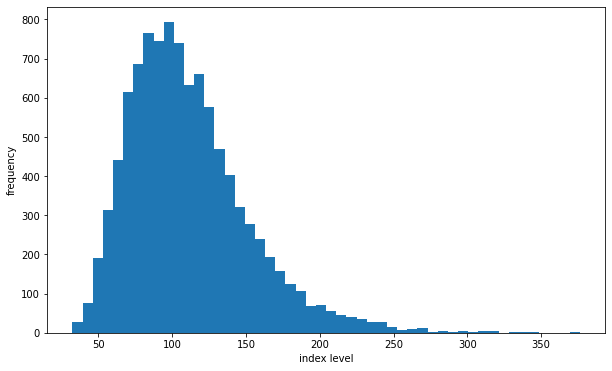

In [12]:
plt.figure(figsize=(10, 6))
plt.hist(S[-1], bins=50)
plt.xlabel('index level')
plt.ylabel('frequency')

In [20]:
print_statistics(S[-1], S[-1])

     statistic     data set 1     data set 2
---------------------------------------------
          size      10000.000      10000.000
           min         32.351         32.351
           max        376.136        376.136
          mean        110.922        110.922
           std         40.664         40.664
          skew          1.124          1.124
      kurtosis          2.107          2.107


Text(0, 0.5, 'index level')

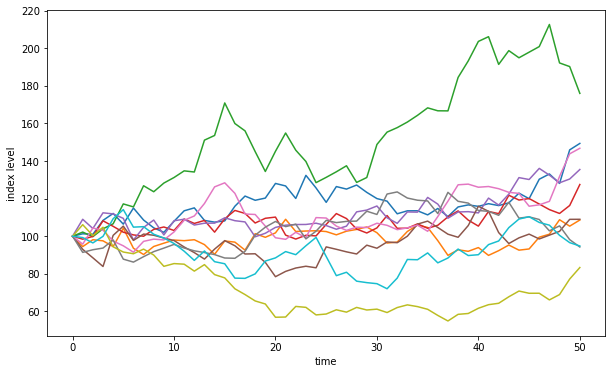

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(S[:, :10], lw=1.5)
plt.xlabel('time')
plt.ylabel('index level')

# References
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-warning">
<font color=black>

- Hilpisch, Yves. Python for finance: mastering data-driven finance. O'Reilly Media, 2018.
- https://github.com/yhilpisch/py4fi2nd/blob/master/code/ch12/12_stochastics.ipynb

</font>
</div>

# Requirements
<hr style = "border:2px solid black" ></hr>

In [22]:
%load_ext watermark
%watermark -v -iv

Python implementation: CPython
Python version       : 3.10.4
IPython version      : 8.3.0

autopep8  : 1.7.0
numpy     : 1.21.6
json      : 2.0.9
matplotlib: 3.5.3
scipy     : 1.7.3

